# Project

# Image processing using python

# Name :- Gaurav Suryavanshi
# Street View House Numbers (.h5 File)
SVHN is a real-word image dataset for developing machine learning and object recongnition algorithms with inimal requirement on data formating but comes from a significantly harder, unsolve, real world problem (recognizing digits =s and numbers in natural scence images) SVHN is obtained from house umbers in Google Street View images.

# Q.1 please design a nn with should be able to predict

Object :- The objective of the project is to learn how to implement a single image classification pipeline based on a deep neural network the goals of this project are as 
- Understand the basic image Classification pipeline and the data-driven approach
- Data fetching and understand the train/test split data
- implemet and aply a deep neural network clasifier(feedforward nn, RELU, activation )
- Understand and implement able to backpropagation
- implement batch normalization for training the neural network
- print the classification accuracy of metrics

In [32]:
# import libraries
import h5py  # latest version of python
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, BatchNormalization
from tensorflow.keras.utils import to_categorical

# 1. Load the dataset
- Let us now load the dataset that is available as a .h5 file.
- Split the data into train and the test dataset

In [9]:
# load the files
import h5py

# Open the HDF5 file in read-only mode
h5f = h5py.File('SVHN_single_grey1.h5', 'r')


In [10]:
# load Train and test data
X_train= h5f['X_train'][:]
y_train= h5f['y_train'][:]
X_test = h5f['X_test'][:]
y_test= h5f ['y_test'][:]

In [11]:
# close
h5f.close()

In [12]:
X_train.shape

(42000, 32, 32)

In [13]:
X_test.shape

(18000, 32, 32)

In [14]:
y_train.shape


(42000,)

In [15]:
y_test.shape

(18000,)

In [16]:
X_train[0]

array([[ 33.0704,  30.2601,  26.852 , ...,  71.4471,  58.2204,  42.9939],
       [ 25.2283,  25.5533,  29.9765, ..., 113.0209, 103.3639,  84.2949],
       [ 26.2775,  22.6137,  40.4763, ..., 113.3028, 121.775 , 115.4228],
       ...,
       [ 28.5502,  36.212 ,  45.0801, ...,  24.1359,  25.0927,  26.0603],
       [ 38.4352,  26.4733,  23.2717, ...,  28.1094,  29.4683,  30.0661],
       [ 50.2984,  26.0773,  24.0389, ...,  49.6682,  50.853 ,  53.0377]],
      dtype=float32)

In [17]:
y_train[0:2]

array([2, 6], dtype=uint8)

In [31]:
len(X_train), len(X_test),X_train.shape, X_test.shape

(1000, 18000, (1000, 1024), (18000, 32, 32))

- There are 42,000 images in the training data and 18,000 images in the testing data.

# 2. Visualizing images
- use X_train to visualize the first 10 images
- use y_train to print the first 10 labels

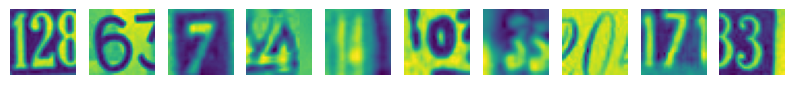

Tags attached to above images are as follow:  [2 6 7 4 4 0 3 0 7 3]


In [18]:
# visualizing the first 10 images in the dataset and their labels

import matplotlib.pyplot as plt

plt.figure(figsize=(10,1))

for i in range(10):
    plt.subplot(1,10,i+1)
    plt.imshow(X_train[i])   # camp='gray' if youhave
    plt.axis('off')
plt.show()

print("Tags attached to above images are as follow: ",y_train[0:10])

# Deep preparation

In [35]:
print("Shape:", X_train[0].shape)
print()
print("First image:\n", X_train[0])

Shape: (1024,)

First image:
 [0.44610076 0.66759744 0.50337692 ... 0.07888301 0.69834515 0.0051647 ]


In [36]:
# Reshaping the dataset to flatten them. Remember that we are trying to reshape the 2D image data into a 1D array

X_train = X_train.reshape(X_train.shape[0], 1024)
X_test = X_test.reshape(X_test.shape[0], 1024)

In [37]:
# Normalize inputs from 0-255 to 0-1

X_train = X_train/255
X_test = X_test/255

In [38]:
# New shape 

print('Training set:', X_train.shape, y_train.shape)
print('Test set:', X_test.shape, y_test.shape)

Training set: (1000, 1024) (1000,)
Test set: (18000, 1024) (18000,)


In [39]:
# one hot encode output
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [40]:
print(X_train.shape)
print(y_train.shape)

(1000, 1024)
(1000, 10)


In [41]:
#Importing losses and optimizers modules
from tensorflow.keras import losses
from tensorflow.keras import optimizers

#Define the function
def nn_model_1():
    model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(1024, )),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(10, activation = 'softmax')
    ]) 
    
    #declare adam optimizer with learning rate of 0.001 
    adam = optimizers.Adam(learning_rate=0.001)
    
    #compile the model
    model.compile(optimizer='adam', loss='categorical_crossentropy',  metrics = ['accuracy'])
    return model


In [ ]:
# encode you target y train and y test
# Neural network
1st layer = 32 x 32, hidden =400, relu
    dropout
    Batch_noarmalization
2nd layer = 400 ,relu
    dropout 
    Batch_noarmalization
3rd layer = 200 , relu
    dropout
    Batch_noarmalization
4th layer = 100, relu
    dropout
    Batch_noarmalization
5th layer = 25 , relu
    dropout
    Batch_noarmalization
6th layer = 10, softmax

In [45]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras import optimizers

# Assuming X_train and X_test are your input features
# Assuming y_train and y_test are your target labels

# Define your target labels (y_train and y_test) using one-hot encoding
#num_classes = 10  # Assuming 10 output classes
#y_train_encoded = np.eye(num_classes)[y_train]
#y_test_encoded = np.eye(num_classes)[y_test]

y_train = np.array(y_train, dtype=np.int32)
y_test = np.array(y_test, dtype=np.int32)

# Define the neural network model
model = Sequential()

# 1st layer: 32 x 32 input shape, 400 units, relu activation
model.add(Dense(400, input_shape=(32*32,), activation='relu'))
model.add(Dropout(0.2))  # Dropout regularization
model.add(BatchNormalization())  # Batch normalization

# 2nd layer: 400 units, relu activation
model.add(Dense(400, activation='relu'))
model.add(Dropout(0.2))  # Dropout regularization
model.add(BatchNormalization())  # Batch normalization

# 3rd layer: 200 units, relu activation
model.add(Dense(200, activation='relu'))
model.add(Dropout(0.2))  # Dropout regularization
model.add(BatchNormalization())  # Batch normalization

# 4th layer: 100 units, relu activation
model.add(Dense(100, activation='relu'))
model.add(Dropout(0.2))  # Dropout regularization
model.add(BatchNormalization())  # Batch normalization

# 5th layer: 25 units, relu activation
model.add(Dense(25, activation='relu'))
model.add(Dropout(0.2))  # Dropout regularization
model.add(BatchNormalization())  # Batch normalization

# Output layer: 10 units (number of classes), softmax activation for multi-class classification
model.add(Dense(num_classes, activation='softmax'))

# Compile the model
sgd = optimizers.SGD(learning_rate=0.01)
model.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])

# Print the model summary
model.summary()

# Train the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=32)


Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_30 (Dense)            (None, 400)               410000    
                                                                 
 dropout_25 (Dropout)        (None, 400)               0         
                                                                 
 batch_normalization_25 (Bat  (None, 400)              1600      
 chNormalization)                                                
                                                                 
 dense_31 (Dense)            (None, 400)               160400    
                                                                 
 dropout_26 (Dropout)        (None, 400)               0         
                                                                 
 batch_normalization_26 (Bat  (None, 400)              1600      
 chNormalization)                                     

In [47]:
result = model.evaluate(X_test, y_test,verbose=2)

563/563 - 2s - loss: 3.5221 - accuracy: 0.0999 - 2s/epoch - 4ms/step


In [48]:
# print the testing accuracy
print('test Accuracy :', result[1])

test Accuracy : 0.0998888909816742
